# Credit Commitments Compliance Evaluation

### 4. Choose a Baseline Algorithm (Evaluate Algorithms)
    a) Split-out validation dataset (train/test/valid)
    b) K-fold Cross Validation
    c) Compare Algorithms
 
#### Load Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from pickle import dump
from pickle import load

%matplotlib inline

set_option('display.width', 100)
set_option('precision', 3)

# set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
# default parameters
seed = 7 # random seed
test_size = 0.20
num_folds = 10
n_splits = 10

# set file path
url = '.\\data\\CreditOne-CCC-adjusted.csv'

In [5]:
# Load dataset
df = pd.read_csv(url, sep=",")

# set index Id column
df = df.set_index('Id')

print('Rows and columns count:', df.shape)
df.head(5)

Rows and columns count: (30000, 21)


,TotalLoan,Gender,Education,MaritalStatus,AgeGroup,HstPaySep15,HstPayAug15,HstPayJul15,HstPayJun15,HstPayMay15,...,BillSep15,BillJun15,BillApr15,PaySep15,PayAug15,PayJul15,PayJun15,PayMay15,PayApr15,DefaultPayment
Id,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,1,2,2,-1,-1,-2,...,3913,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,1,-1,2,0,0,0,...,2682,3272,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,3,0,0,0,0,0,...,29239,14331,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,3,0,0,0,0,0,...,46990,28314,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,7,-1,0,-1,0,0,...,8617,20940,19131,2000,36681,10000,9000,689,679,0


#### Split into Train and Test Sets

In [6]:
array = df.values
X = array[:,0:19]
Y = array[:,20]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [8]:
# Model train
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# Model test
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 78.52%


We can see that the estimated accuracy for the model was approximately 78.52%.

##### K-fold Cross Validation

In [11]:
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.88%, Standard Deviation: (0.87%)


You can see that we report both the mean and the standard deviation of the performance measure. When summarizing performance measures, it is a good practice to summarize the distribution of the measures, in this case assuming a Gaussian distribution of performance (a very reasonable assumption) and recording the mean and standard deviation.

##### Repeated Random Test-Train Splits

Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation. This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. You can also repeat the process many more times as needed to improve the accuracy.

In [10]:
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.00%, Standard Deviation: (0.43%)


##### What Techniques to Use

After comparing the three techniques and comparing their indicators for 'Accuracy' and 'Standard Deviation', better results were achieved with '**Random Test-Train Splits**', this being the one we will use for the rest of the exercises.

#### Compare Algorithms

For the purposes of implementation, the following six classification algorithms will be compared on a single dataset:
- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

In [12]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

In [10]:
# evaluate each model with: K-fold Cross Validation
results1 = []
names1 = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results1.append(cv_results)
    names1.append(name)
    msg = "%s -> accuracy: (%3f), Standard Deviation: (%3f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR -> accuracy: (77.720833), Standard Deviation: (0.880351)
LDA -> accuracy: (81.241667), Standard Deviation: (1.178187)
KNN -> accuracy: (75.250000), Standard Deviation: (0.930949)
CART -> accuracy: (72.904167), Standard Deviation: (1.092120)
NB -> accuracy: (38.412500), Standard Deviation: (2.060664)
SVM -> accuracy: (77.725000), Standard Deviation: (0.875436)


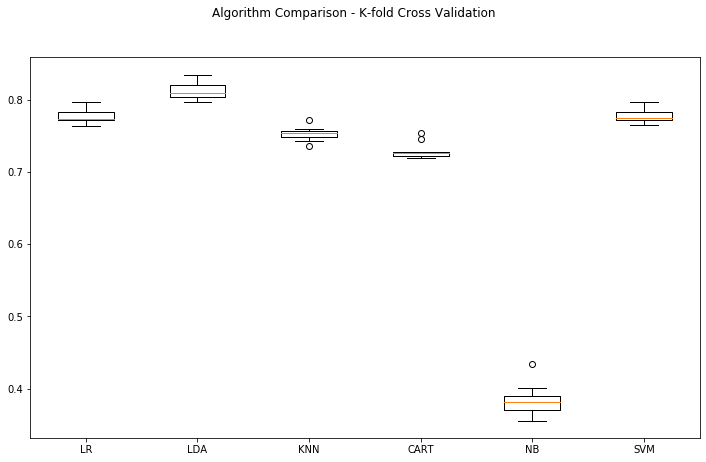

In [19]:
# boxplot algorithm comparison with: K-fold Cross Validation
fig = plt.figure(figsize=(12, 7))
fig.suptitle('Algorithm Comparison - K-fold Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
#plt.figure(figsize=(12, 8))
plt.show()

In [13]:
# evaluate each model with: Repeated Random Test-Train Splits
results2 = []
names2 = []
scoring = 'accuracy'
for name, model in models:
    kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s -> accuracy: (%3f), Standard Deviation: (%3f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR -> accuracy: (77.837500), Standard Deviation: (0.661884)
LDA -> accuracy: (81.252083), Standard Deviation: (0.681950)
KNN -> accuracy: (75.377083), Standard Deviation: (0.562612)
CART -> accuracy: (72.575000), Standard Deviation: (0.565593)
SVM -> accuracy: (77.837500), Standard Deviation: (0.655029)


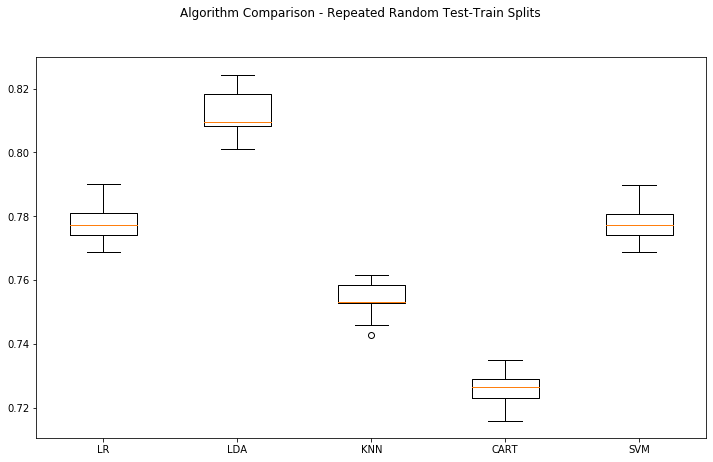

<Figure size 432x288 with 0 Axes>

In [15]:
# boxplot algorithm comparison with: Repeated Random Test-Train Splits
fig = plt.figure(figsize=(12, 7))
fig.suptitle('Algorithm Comparison - Repeated Random Test-Train Splits')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()
plt.savefig('.\\images\\AlgorithmComparison_RRTT_Splits.png')

Results suggest that both '**Linear Discriminant Analysis**' and '**Logistic Regression**' are perhaps worthy of further study on this problem with '**Repeated Random Test-Train Splits**'. The following table shows the obtained results.

In [21]:
# create table
algsData = pd.DataFrame(columns=('Algorithm','Acronym','CV','Accuracy','Standard Deviation'))
algsData.loc[len(algsData)]=['Logistic Regression','LR','10-K-fold CV','77.88%','0.87%']
algsData.loc[len(algsData)]=['Linear Discriminant Analysis','LDA','10-K-fold CV','81.15%','0.72%']
algsData.loc[len(algsData)]=['k-Nearest Neighbors','KNN','10-K-fold CV','75.48%','0.79%']
algsData.loc[len(algsData)]=['Classification and Regression Trees','CART','10-K-fold CV','72.36%','0.49%']
algsData.loc[len(algsData)]=['Naive Bayes','NB','10-K-fold CV','39.38%','1.94%']
algsData.loc[len(algsData)]=['Support Vector Machines','SVM','10-K-fold CV','77.88%','0.87%']
algsData.loc[len(algsData)]=['Logistic Regression','LR','Repeated Random Splits','78.00%(**)','0.43%(**)']
algsData.loc[len(algsData)]=['Linear Discriminant Analysis','LDA','Repeated Random Splits','81.14%(*)','0.44%(*)']
algsData.loc[len(algsData)]=['k-Nearest Neighbors','KNN','Repeated Random Splits','75.58%','0.67%']
algsData.loc[len(algsData)]=['Classification and Regression Trees','CART','Repeated Random Splits','72.78%','0.49%']
algsData.loc[len(algsData)]=['Naive Bayes','NB','Repeated Random Splits','38.58%','1.59%']
algsData.loc[len(algsData)]=['Support Vector Machines','SVM','Repeated Random Splits','77.99%','3.66%']
algsData

,Algorithm,Acronym,CV,Accuracy,Standard Deviation
0,Logistic Regression,LR,10-K-fold CV,77.88%,0.87%
1,Linear Discriminant Analysis,LDA,10-K-fold CV,81.15%,0.72%
2,k-Nearest Neighbors,KNN,10-K-fold CV,75.48%,0.79%
3,Classification and Regression Trees,CART,10-K-fold CV,72.36%,0.49%
4,Naive Bayes,NB,10-K-fold CV,39.38%,1.94%
5,Support Vector Machines,SVM,10-K-fold CV,77.88%,0.87%
6,Logistic Regression,LR,Repeated Random Splits,78.00%(**),0.43%(**)
7,Linear Discriminant Analysis,LDA,Repeated Random Splits,81.14%(*),0.44%(*)
8,k-Nearest Neighbors,KNN,Repeated Random Splits,75.58%,0.67%
9,Classification and Regression Trees,CART,Repeated Random Splits,72.78%,0.49%


#### Validation Model Task

In [38]:
kfoldTs = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
modelTs = LinearDiscriminantAnalysis()

scoring = 'accuracy'
resultsTs = cross_val_score(modelTs, X_train, Y_train, cv=kfoldTs, scoring=scoring)

print("Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (resultsTs.mean()*100.0, resultsTs.std()*100.0))

Accuracy: 81.25%, Standard Deviation: (0.68%)


In [39]:
# Model test
modelTs.fit(X_train, Y_train)

result = modelTs.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 81.22%


In [40]:
predictions = modelTs.predict(X_test)
Y_test

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8121666666666667
[[4541  169]
 [ 958  332]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4710
           1       0.66      0.26      0.37      1290

    accuracy                           0.81      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.79      0.81      0.78      6000



#### Finalize and save

In [44]:
# save the model to disk
modelFileName = '.\\models\\lda_model.sav'
dump(model, open(modelFileName, 'wb'))